<a href="https://colab.research.google.com/github/uirom/practice/blob/main/(ORANGE)_P230_linear_regression_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 데이터셋에서 추출 할수있는 변수
# 독립변수(X) : id, date, bedrooms, bathrooms, sqft_living, floors, waterfront, grade, condition (집의 컨디션, 평방 피트, 침실 수, 매각된 날짜 등)
# 종속변수(Y) : price (주택가격)


In [ ]:
# 데이터 핸들링을 위한 패키지
import numpy as np
import pandas as pd

# 통계학습을 위한 패키지
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

# 기계학습을 위한 패키지
import sklearn.linear_model
from sklearn.model_selection import train_test_split

# 시각화를 위한 패키지
from matplotlib import pyplot as plt
import seaborn as sns

# 그래프를 실제로 그리기 위한 설정
%matplotlib inline

# 경고메세지를 무시
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# csv 파일을 불러와서 df(DataFrame)에 담기

df = pd.read_csv('/content/drive/MyDrive/python data/kc_house_data.csv')

# index를 1로 시작하도록 수정
df.index += 1
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
2,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
3,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
4,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
5,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21609,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21610,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21611,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21612,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [ ]:
# 가져온 데이터에 결측치가 있는지 확인
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [ ]:
# info()를 통해 컬럼의수와 int,float과같은 숫자형인지, object타입인지 탐색적 데이터분석(EDA)을 할수있다
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 1 to 21613
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [ ]:
# 보통 describe()을통해 기본적인 기술 통계값 확인 가능 - 중간값, 결측치, 왜도, 첨도까지 보기 위해 작성

# 중간값, 결측치, 왜도, 첨도를 표시
df_stats = df.describe().T

skew_results = []
kurtosis_results = []
null_results = []
median_results = []

for idx, val in enumerate(df_stats.index):
  median_results.append(df[val].median())
  skew_results.append(df[val].skew())
  kurtosis_results.append(df[val].kurtosis())
  null_results.append(df[val].isnull().sum())

df_stats['median'] = median_results
df_stats['missing'] = null_results
df_stats['skewness'] = skew_results
df_stats['kurtosis'] = kurtosis_results
df_stats

# 결과 확인: 위에서 두번째줄의 skewness값을 보면 4.02로 왼쪽으로 치우쳐져 있음을 확인! - 자연로그 활용하여 분포 조정 필요

,count,mean,std,min,25%,50%,75%,max,median,missing,skewness,kurtosis
id,21613.0,4.580302e+09,2.876566e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09,3.904930e+09,0,0.243329,-1.260542
price,21613.0,5.400881e+05,3.671272e+05,7.500000e+04,3.219500e+05,4.500000e+05,6.450000e+05,7.700000e+06,4.500000e+05,0,4.024069,34.585540
bedrooms,21613.0,3.370842e+00,9.300618e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01,3.000000e+00,0,1.974300,49.063653
bathrooms,21613.0,2.114757e+00,7.701632e-01,0.000000e+00,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00,2.250000e+00,0,0.511108,1.279902
sqft_living,21613.0,2.079900e+03,9.184409e+02,2.900000e+02,1.427000e+03,1.910000e+03,2.550000e+03,1.354000e+04,1.910000e+03,0,1.471555,5.243093
sqft_lot,21613.0,1.510697e+04,4.142051e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068800e+04,1.651359e+06,7.618000e+03,0,13.060019,285.077820
floors,21613.0,1.494309e+00,5.399889e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00,1.500000e+00,0,0.616177,-0.484723
waterfront,21613.0,7.541757e-03,8.651720e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0,11.385108,127.632494
view,21613.0,2.343034e-01,7.663176e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00,0.000000e+00,0,3.395750,10.893022
condition,21613.0,3.409430e+00,6.507430e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00,3.000000e+00,0,1.032805,0.525764


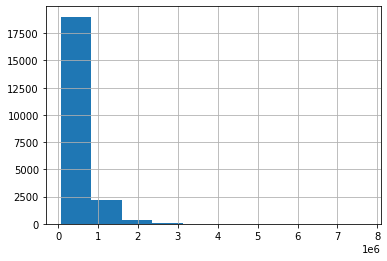

In [ ]:
df['price'].hist()

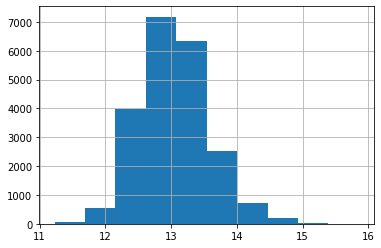

In [ ]:
np.log(df['price']).hist()

In [ ]:
np.log(df['price']).skew()

# 결과확인: 자연로그 취해서 종속변수(price)가 정규분포 형태 띄는것 확인 - 선형 회귀분석시 자연로그 적용할 예정

0.42807247557592526

In [ ]:
def seperate_dtype(df):
  df_obj = df.select_dtypes(include=['object'])
  df_numr = df.select_dtypes(include=['int64', 'float64'])
  return [df_obj, df_numr]

(df_obj, df_numr) = seperate_dtype(df)

# 이 함수를 통해 object 타입과 int64, float64 타입을 분류하여 데이터 살펴보기

In [ ]:
df_obj.head()
# head통해 확인해보니 date의 전처리가 필요한것 알수있다

,date
1,20141013T000000
2,20141209T000000
3,20150225T000000
4,20141209T000000
5,20150218T000000


In [ ]:
# date 컬럼을 앞에서 4자리만 추출하고 타입을 int64로 변경하고, 컬럼명을 date2로 저장

df_obj['date2'] = df_obj['date'].apply(lambda x:x[0:4])
df['date2'] = df_obj['date2'].astype('int64')
df['date2']

1        2014
2        2014
3        2015
4        2014
5        2015
         ... 
21609    2014
21610    2015
21611    2014
21612    2015
21613    2014
Name: date2, Length: 21613, dtype: int64

In [ ]:
# date2(집이매각된연도)와 yr_built(지어진연도)의 기간 차이를 비교해서 sold-build-years라는 새로운 변수 추가

df['sold-built_years'] = df.apply(lambda x: ((x['date2'])-(x['yr_built'])), axis=1)
df['sold-built_years']

1        59
2        63
3        82
4        49
5        28
         ..
21609     5
21610     1
21611     5
21612    11
21613     6
Name: sold-built_years, Length: 21613, dtype: int64

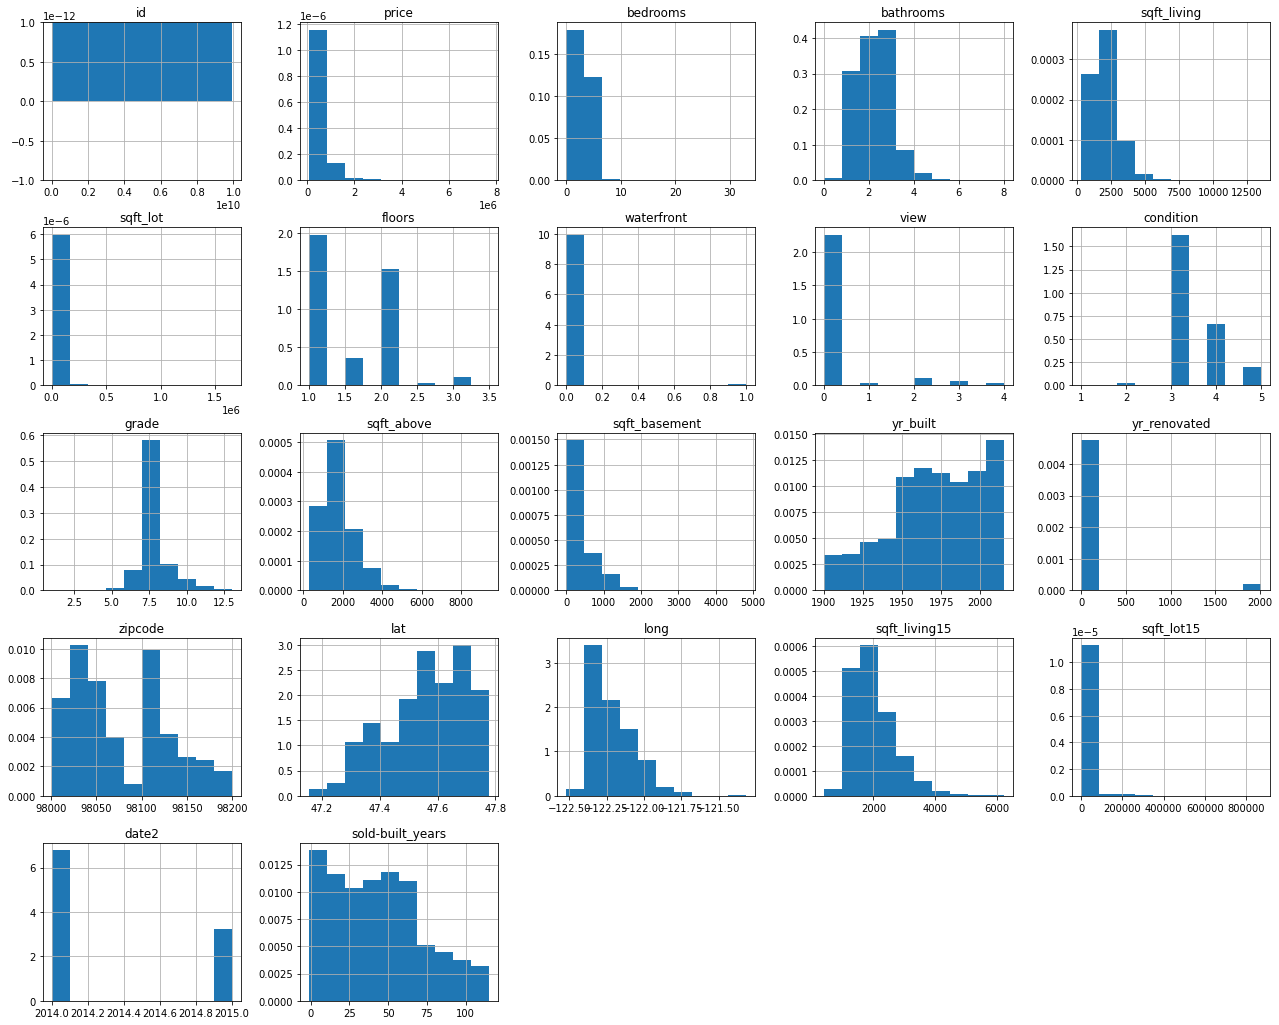

In [ ]:
# 지금까지 데이터의 전체적인 파악 및 전처리 완료 - 시각화 통해 데이터 특징 살펴보기
df.hist(figsize=(22, 18), density = True)
plt.show()

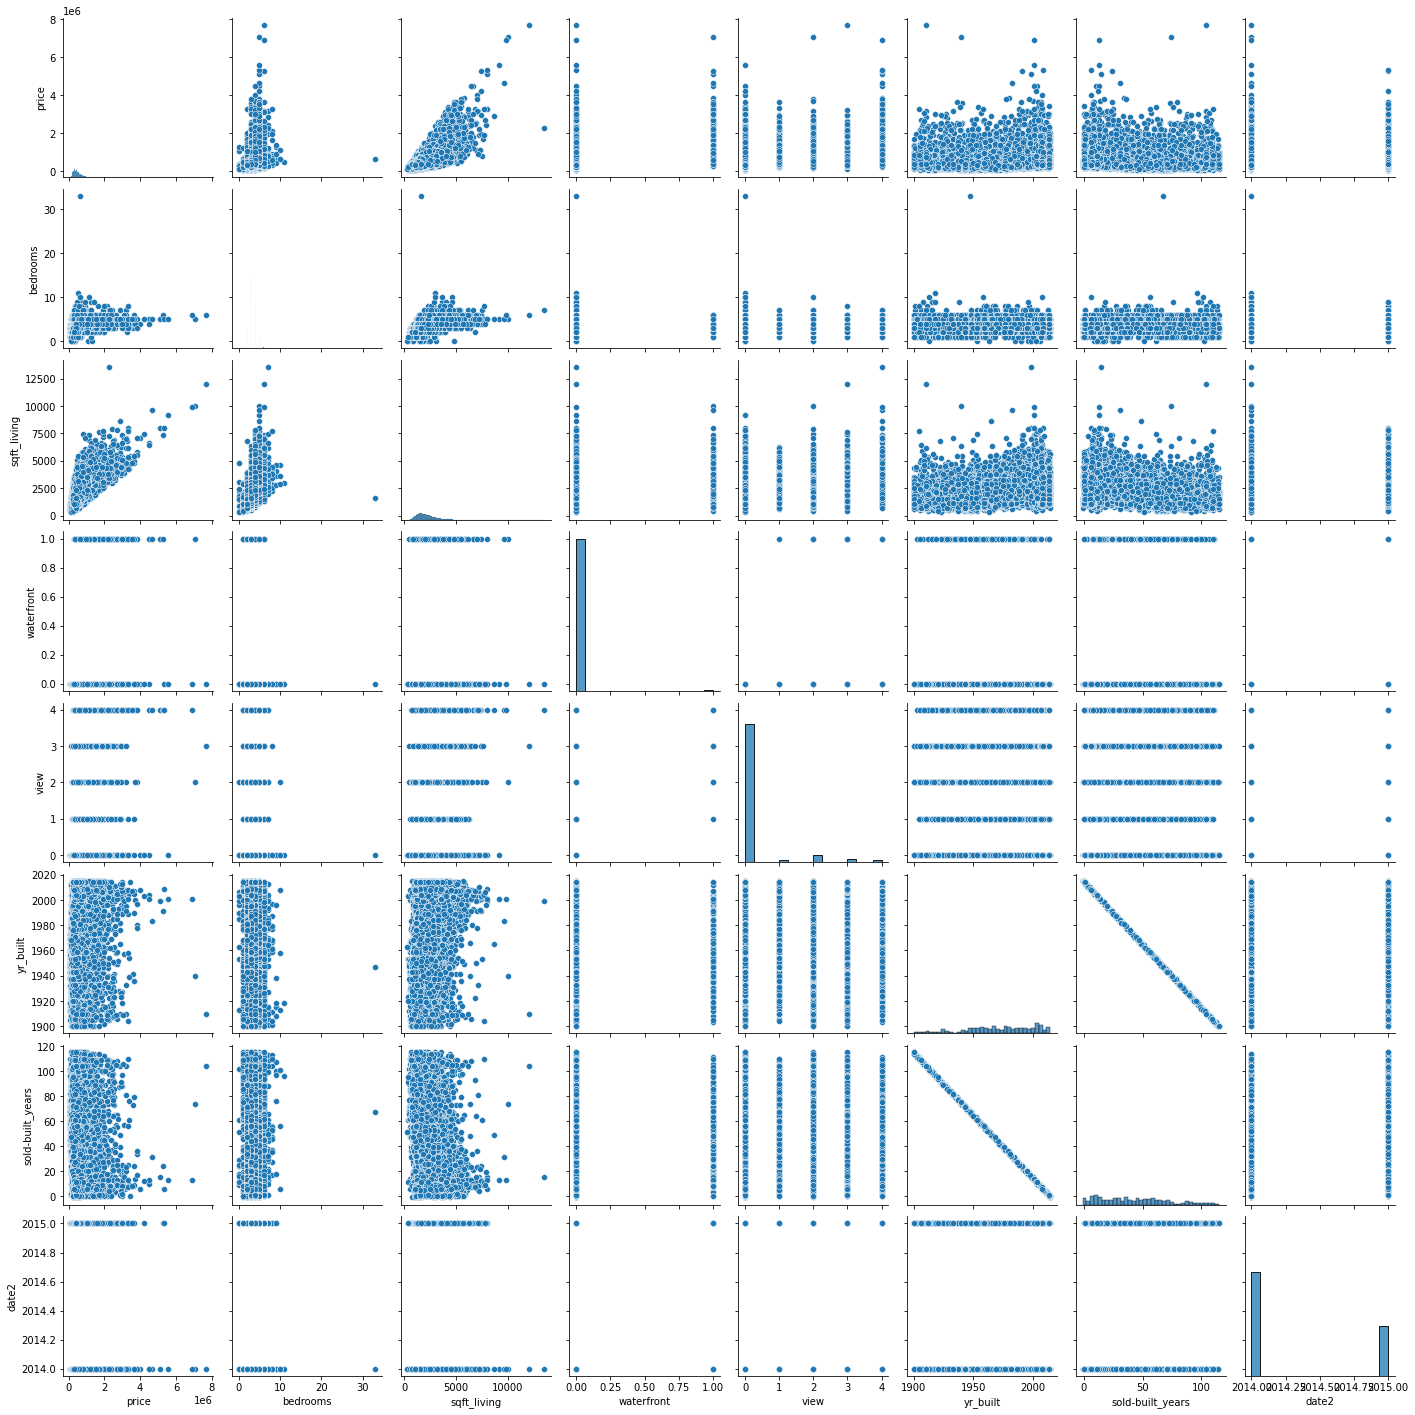

In [ ]:
# 종속변수(price)와 선형관계 있을것 같은 독립변수들을 선정하여 산점도 그리기
df_pairplot = df[['price', 'bedrooms', 'sqft_living', 'waterfront', 'view', 'yr_built','sold-built_years', 'date2']]

sns.pairplot(df_pairplot)
plt.show()

# 결과확인: 산점도를 통해서 종속변수와 독립변수들 사이의 선형관계를 대략적으로 파악가능
#         특히 다른변수들과는 달리 price와 sqpt_living간의 선형관계를 볼 수있다 (맨 위줄에서 오른쪽으로 3번째 산점도에 해당)

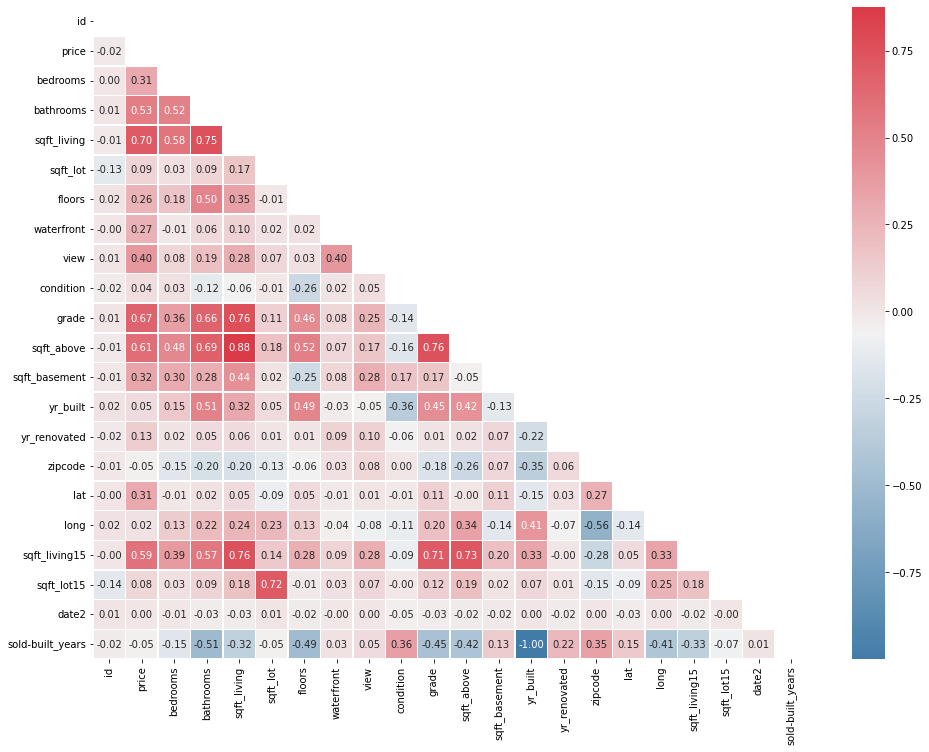

In [ ]:
# 히트맵을 통해 종속변수와 상관관계 높은 독립변수들은 무엇인지, 독립변수들간의 상관관계 높은것들은 어떤것인지 알아보기

# 반대쪽 삼각형은 안보이게 설정
# fmt = 실제값 표시. 2f = 소수점 둘째자리까지

df_corr = df.corr()
cmap = sns.diverging_palette(240, 10, n=9, as_cmap=True)

mask = np.zeros_like(df_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(16,12))

sns.heatmap(df.corr(), annot=True, mask=mask, cmap=cmap, linewidths=.5, fmt='.2f', annot_kws={"size": 10} )

# 결과확인: price와 상관관계 높은 변수들 확인 가능 (아랫단 행의price 확인)

In [ ]:
# price와 상관관계가 높은 변수들만 추려서 확인

df_corr.sort_values(by='price', ascending=False)[['price']] #대괄호 한번만 써도 값이 나오긴 하는데 두번쓰면 데이터 프레임 형태로 나옴

# 결과확인: sqft_living, sqft_above, sqft_living15 세 변수들이 상관관계 높게 나옴 확인


,price
price,1.000000
sqft_living,0.702035
grade,0.667434
sqft_above,0.605567
sqft_living15,0.585379
bathrooms,0.525138
view,0.397293
sqft_basement,0.323816
bedrooms,0.308350
lat,0.307003


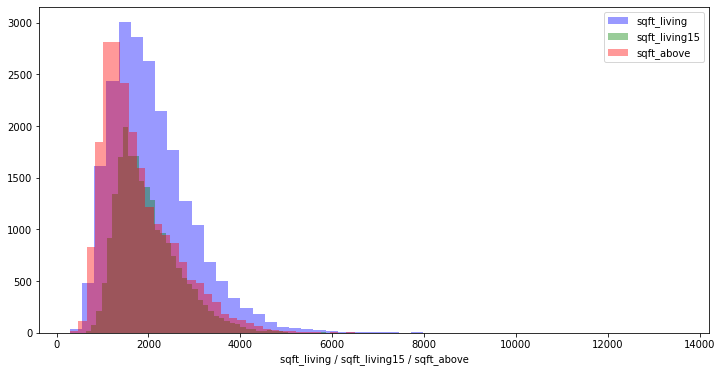

In [ ]:
# sqft_living, sqft_above, sqft_living15 세 변수들이 상관관계 높게 나옴 확인. 세 변수들의 데이터 분포 체크

living = df[['sqft_living', 'sqft_living15', 'sqft_above']]

# 한번에 보기
plt.figure(figsize=(12,6))

ax = sns.distplot(df['sqft_living'], hist=True, norm_hist=False, kde=False, label="sqft_living", color='blue')
ax = sns.distplot(df['sqft_living15'], hist=True, norm_hist=False, kde=False, label="sqft_living15", color='green')
ax = sns.distplot(df['sqft_above'], hist=True, norm_hist=False, kde=False, label="sqft_above", color='red')
ax.set(xlabel="sqft_living / sqft_living15 / sqft_above")

plt.legend()
plt.show()


# 그림에서 보듯이 세 변수들의 분포가 비슷함을 확인가능. 따라서 다중공선성이 존재할경우 이 중 price와 상관관계 가장 높은 sqft_living으로 분석

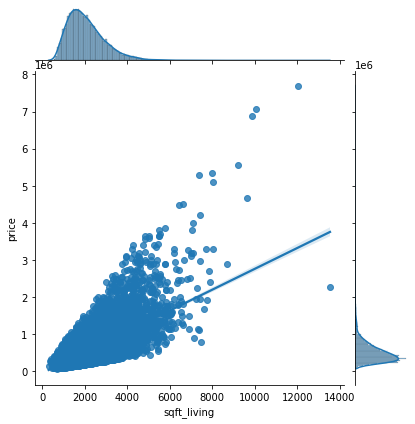

In [ ]:
# 종속변수(price)와 가장 상관관계 높은 sqft_living변수를 독립변수로 단순 선형 회귀분석 실시.
# 설명변수(X)를 sqf_living으로 하고, 반응변수(y)로 price했을때 두 변수간의 선형 관계 확인

sns.jointplot(x='sqft_living', y='price', data=df, kind='reg')
plt.show()

In [ ]:
# 회귀분석시에는 상수항 추가 해야함 - add_constant 사용
X = df[['sqft_living']]
y = df[['price']]

# 상수항을 추가
X = sm.add_constant(X, has_constant="add")
X.head()

,const,sqft_living
1,1.0,1180
2,1.0,2570
3,1.0,770
4,1.0,1960
5,1.0,1680


In [ ]:
# fit() 함수를 선형모델에 적합시키고 결과를 result_model에 저장하고 summary()함수를 통해 결과 확인
# 모델 fit

model = sm.OLS(y,X)
result_model = model.fit()
result_model.summary()

# 결과 확인: p>|t|는 p-value를 뜻한다. 따라서, 유의확률이 유의수준 0.05보다 훨씬 작아 귀무가설은 기각됨 = 통계학적 유의성이 확보됨

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.100e+04
Date:                Mon, 30 Jan 2023   Prob (F-statistic):               0.00
Time:                        11:13:52   Log-Likelihood:            -3.0027e+05
No. Observations:               21613   AIC:                         6.005e+05
Df Residuals:                   21611   BIC:                         6.006e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.358e+04   4402.690     -9.899      0.000   -5.22e+04    -3.5e+04
sqft_living   280.6236      1.936    144.920      0.000     276.828     284.419
==============================================================================
Omnibus:                    14832.490   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           546444.713
Skew:                           2.824   Prob(JB):                         0.00
Kurtosis:                      26.977   Cond. No.                     5.63e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

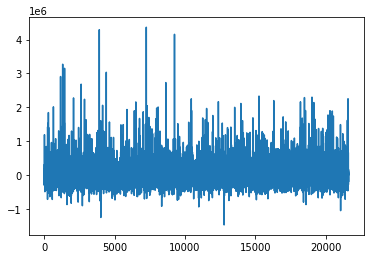

In [ ]:
# 잔차를 확인
result_model.resid.plot()
plt.show()

In [ ]:
# p 246

In [ ]:
# 다중선형회귀
# id를 제외한 모든 독립변수 사용해서 다중 선형회귀분석 해보기. 선별한 독립변수들로 다시 다중 선형회귀분석

df_reg = df[['price',
             'bedrooms',
             'bathrooms',
             'sqft_living',
             'sqft_lot',
             'floors',
             'waterfront',
             'view',
             'condition',
             'grade',
             'sqft_above',
             'sqft_basement',
             'yr_built',
             'yr_renovated',
             'zipcode',
             'lat',
             'long',
             'sqft_living15',
             'sqft_lot15',
             'date2',
             'sold-built_years']]

In [ ]:
df_kc_reg = sm.add_constant(df_reg, has_constant='add')
feature_columns = list(df_kc_reg.columns.difference(['price']))

x = df_kc_reg[feature_columns]
y = df_kc_reg.price

# 회귀모형
multi_linear_model = sm.OLS(y,x)
result_model_1 = multi_linear_model.fit()
result_model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.701
Model:                            OLS   Adj. R-squared:                  0.701
Method:                 Least Squares   F-statistic:                     2816.
Date:                Mon, 30 Jan 2023   Prob (F-statistic):               0.00
Time:                        11:23:51   Log-Likelihood:            -2.9455e+05
No. Observations:               21613   AIC:                         5.891e+05
Df Residuals:                   21594   BIC:                         5.893e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
bathrooms         4.125e+04   3245.693     12.710      0.000    3.49e+04    4.76e+04
bedrooms         -3.598e+04   1887.302    -19.064      0.000   -3.97e+04   -3.23e+04
condition         2.767e+04   2348.964     11.781      0.000    2.31e+04    3.23e+04
const             -5.46e+07   6.59e+06     -8.282      0.000   -6.75e+07   -4.17e+07
date2             1.938e+04   1952.649      9.926      0.000    1.56e+04    2.32e+04
floors            7322.7479   3587.535      2.041      0.041     290.915    1.44e+04
grade              9.61e+04   2147.594     44.750      0.000    9.19e+04       1e+05
lat               6.053e+05   1.07e+04     56.511      0.000    5.84e+05    6.26e+05
long             -2.147e+05   1.31e+04    -16.387      0.000    -2.4e+05   -1.89e+05
sold-built_years    1.1e+04    976.502     11.265      0.000    9086.332    1.29e+04
sqft_above          70.7636      2.248     31.480      0.000      66.358      75.170
sqft_basement       39.8429      2.640     15.092      0.000      34.668      45.018
sqft_living        110.6182      2.264     48.858      0.000     106.180     115.056
sqft_living15       21.7694      3.439      6.330      0.000      15.028      28.511
sqft_lot             0.1249      0.048      2.612      0.009       0.031       0.219
sqft_lot15          -0.3794      0.073     -5.191      0.000      -0.523      -0.236
view              5.251e+04   2135.068     24.596      0.000    4.83e+04    5.67e+04
waterfront        5.837e+05   1.73e+04     33.705      0.000     5.5e+05    6.18e+05
yr_built          8381.0887    977.491      8.574      0.000    6465.135    1.03e+04
yr_renovated        20.7777      3.648      5.696      0.000      13.628      27.928
zipcode           -582.8028     32.905    -17.712      0.000    -647.298    -518.307
==============================================================================
Omnibus:                    18432.447   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1903378.130
Skew:                           3.576   Prob(JB):                         0.00
Kurtosis:                      48.414   Cond. No.                     5.67e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.8e-22. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [ ]:
# 단순 선형회귀 아닌 다중 선형회귀 이므로 "다중 공선성" 문제 확인 필요

from statsmodels.stats.outliers_influence import variance_inflation_factor

df_vif = pd.DataFrame()
df_vif["VIF"] = np.round([variance_inflation_factor(df_reg.values, i) for i in range (df_reg.shape[1])],2)
df_vif["features"] = df_reg.columns
df_vif.sort_values(by='VIF', ascending=False)

# 결과확인: 설명변수가 다수이기 때문에 모형에 포함된 설명변수의 정보가 중첩(상관관계 가짐)으로 다중 공선성 문제가 발생하는 것 확인

,VIF,features
10,inf,sqft_above
11,inf,sqft_basement
19,inf,date2
12,inf,yr_built
20,inf,sold-built_years
3,inf,sqft_living
14,4922845.94,zipcode
16,1388182.32,long
15,159610.79,lat
9,162.17,grade


In [ ]:
# 위의 다중공선성 문제 줄이기 위해 다음 독립변수들을 선택해서 다중 선형 회귀분석을 실시.
# 반응 변수(price)에 자연로그를 취해 비대칭인 데이터의 분포를 완화한 상태에서 회귀분석 실시
# - bedrooms(연속형), sqft_living(연속형), waterfront(범주형), view(범주형), sold-built_years:date-yr_built(연속형)

df_reg = df[['bedrooms', 'sqft_living', 'waterfront', 'view', 'sold-built_years', 'price']]

df_kc_reg = sm.add_constant(df_reg, has_constant='add')
feature_columns = list(df_kc_reg.columns.difference(['price']))

x = df_kc_reg[feature_columns]

# y(price) 값이 높으므로 자연로그를 써서 비대칭인 값을 수정한다
y = np.log(df_kc_reg.price)

# 회귀모형
multi_linear_model = sm.OLS(y,x)
result_model_2 = multi_linear_model.fit()
result_model_2.summary()

# 결과분석: 모든 독립변수들의 P>|t|(p-value) 유의 확률이 유의수준 0.05보다 훨씬 작아 모형 통계학적 유의성 확인.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.529
Model:                            OLS   Adj. R-squared:                  0.529
Method:                 Least Squares   F-statistic:                     4852.
Date:                Mon, 30 Jan 2023   Prob (F-statistic):               0.00
Time:                        11:46:25   Log-Likelihood:                -8675.5
No. Observations:               21613   AIC:                         1.736e+04
Df Residuals:                   21607   BIC:                         1.741e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
bedrooms            -0.0413      0.003    -12.647      0.000      -0.048      -0.035
const               12.1722      0.011   1128.098      0.000      12.151      12.193
sold-built_years     0.0025   8.96e-05     27.564      0.000       0.002       0.003
sqft_living          0.0004   3.62e-06    117.929      0.000       0.000       0.000
view                 0.0785      0.004     21.269      0.000       0.071       0.086
waterfront           0.2885      0.031      9.285      0.000       0.228       0.349
==============================================================================
Omnibus:                      190.066   Durbin-Watson:                   1.956
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              215.753
Skew:                          -0.183   Prob(JB):                     1.41e-47
Kurtosis:                       3.325   Cond. No.                     2.88e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.88e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# 다시 다중공선성 살펴보기

df_vif = pd.DataFrame()
df_vif["VIF"] = np.round([variance_inflation_factor(df_reg.values, i) for i in range (df_reg.shape[1])], 2)
df_vif["features"] = df_reg.columns
df_vif.sort_values(by='VIF', ascending=False)

# 결과분석: 다중공선성 문제 줄어들었음을 확인
# 내가 볼때는 다중 공선성이라는게 내가 보려는 값 이외의 다른 값들이 나오는것을 말하는것 같음. 그걸 중첩이라고 보는것이고. 지금의 값은 내가 보려는 값만 보여줌을 나타내는게 아닐까

,VIF,features
1,19.32,sqft_living
0,14.17,bedrooms
5,7.56,price
4,2.85,sold-built_years
3,1.48,view
2,1.24,waterfront


In [ ]:
# p254 회귀모형  진단 - 선형성, 오차항의 독립성 ∙ 등분산성 ∙ 정규성 진단

In [ ]:
# 1. 정규성 검정

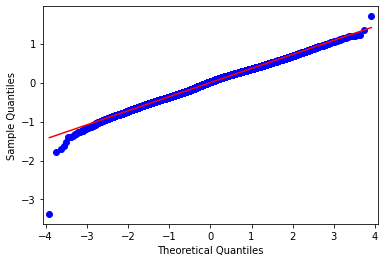

In [ ]:
# Q-Q 플롯

qqplot = sm.qqplot(result_model_2.resid, line="s")

Text(0, 0.5, 'Residual')

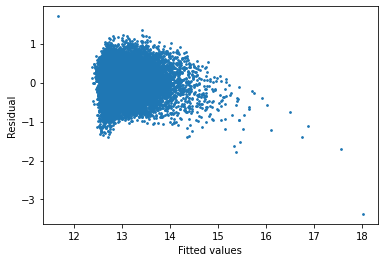

In [ ]:
# 잔차 패턴 확인

fitted = result_model_2.predict()

resid = result_model_2.resid
pred = result_model_2.predict(x)
fig = plt.scatter(pred, resid, s=3)

# plt.xlim(2)
# plt.xlim(20, 140)
# plt.xlim(0.5)
plt.xlabel('Fitted values')
plt.ylabel('Residual')

In [ ]:
# 샤피로-윌크 검정

result_shapiro = stats.shapiro(result_model_2.resid)
print(f'F value : {result_shapiro[0]:.4f} / p-value : {result_shapiro[1]:.4f}')

if result_shapiro[1] < 0.05:
  print("p-value < 0.05입니다.")

# 결과검정: p-value < 0.05여서 정규성 만족함

F value : 0.9959 / p-value : 0.0000
p-value < 0.05입니다.


In [ ]:
# 2. 독립성 검정

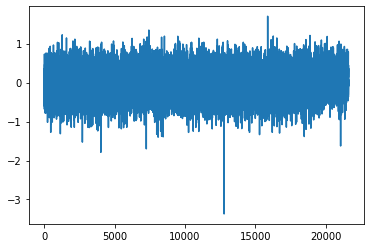

In [ ]:
# 잔차 그래프
result_model_2.resid.plot()
plt.show()

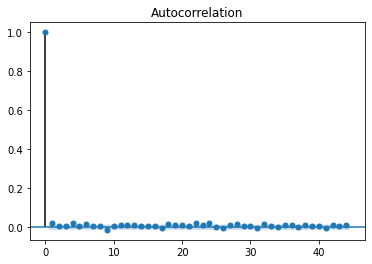

In [ ]:
# ACF (Auto-Correlation Function)
sm.graphics.tsa.plot_acf(result_model_2.resid)
plt.show()

# 결과분석: ACF 그래프에서 0 시차이후에 파란색 구간을 벗어나는 시차가 존재하지 않기에 독립성 만족

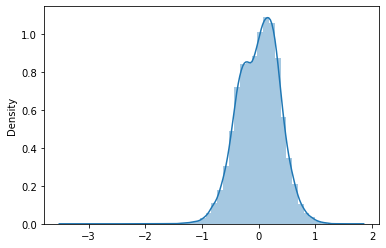

In [ ]:
# 등분산성
sns.distplot(result_model_2.resid)
plt.show()

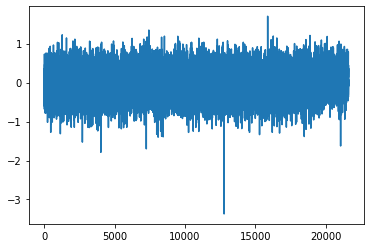

In [ ]:
result_model_2.resid.plot()
plt.show()

# 결과분석: 잔차 그래프 통해서 오차의 등분산성 가정을 만족하는것 확인가능